# SECONDO ESERCIZIO

**PRIMA PARTE**

Il file halo-catalog.fit contiene i profili di densità di 40103 aloni di materia oscura estratti da una simulazione cosmologica N-body, il loro redshift, e la ricchezza (una somma pesata del numero di galassie che popolano l'alone e che funge da "proxy" per la massa).
I nomi delle colonne contenenti i dati sono rispettivamente:

- profilo densità='SIGMA_of_R' [M☉/Mpc^2 ]
- redshift='Z',
- ricchezza='LAMBDA_TR'.

I valori di R in [Mpc] a cui sono calcolati i profili di densità si trovano nel file R-values.npy.

In questa prima parte viene richiesto di suddividere il catalogo in 5 intervalli di ricchezza aventi come estremi λ = [15,20,30,45,60,200]; calcolare il redshift, il profilo di densità medio e la sua deviazione standard in funzione di R per ognuno dei 5 intervalli, e mostrare i risultati in un grafico con 5 pannelli.

In [1]:
# Installo tutte le librerie necessarie 
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import emcee
from scipy.stats import norm
from scipy import stats
import corner
from scipy.optimize import minimize
import pygtc
import math

Gruppo 1:
  Redshift medio: 0.4600900411605835
  Profilo densità medio: [6.04037423e+14 4.90045971e+14 3.59895811e+14 2.44186171e+14
 1.57314921e+14 9.94077143e+13 6.32655394e+13 4.25876039e+13]
  Deviazione standard del profilo medio: [2.64022629e+14 1.89365695e+14 1.29024643e+14 8.42692884e+13
 5.49376481e+13 3.67401233e+13 2.58197873e+13 1.89469609e+13]

Gruppo 2:
  Redshift medio: 0.46388739347457886
  Profilo densità medio: [6.71748119e+14 5.49872449e+14 4.07836975e+14 2.78087908e+14
 1.79839928e+14 1.13148976e+14 7.07332627e+13 4.62313887e+13]
  Deviazione standard del profilo medio: [2.90986786e+14 2.15851702e+14 1.50340230e+14 9.89038610e+13
 6.33444636e+13 4.08677379e+13 2.73329768e+13 1.92529207e+13]

Gruppo 3:
  Redshift medio: 0.4592076539993286
  Profilo densità medio: [8.32238229e+14 6.87506824e+14 5.16437068e+14 3.57835368e+14
 2.34592791e+14 1.48061297e+14 9.08488260e+13 5.60359056e+13]
  Deviazione standard del profilo medio: [3.57741583e+14 2.71794288e+14 1.92174486e+

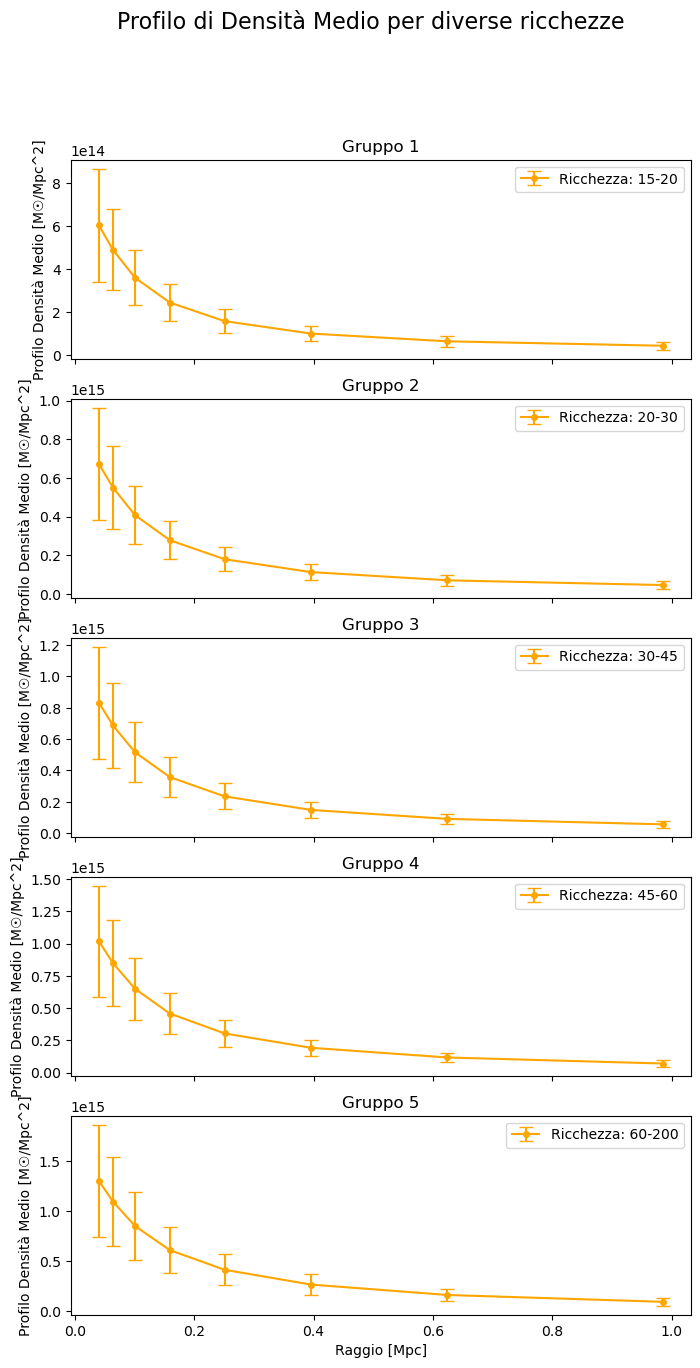

In [3]:
# Carico i cataloghi ed estraggo le colonne che mi servono
# Uso getdata(), questa funzione specifica per file FITS serve per estrarre i dati principali da un file FITS (Flexible Image Transport System)

catalog_data = fits.getdata('/Users/gaiabilosi/Desktop/halo_catalog.fit')
ricchezza = catalog_data['LAMBDA_TR']
profilo_densita_data = catalog_data['SIGMA_of_R']
redshift = catalog_data['Z']
R_values = np.load('/Users/gaiabilosi/Desktop/R_values.npy')

# Definisco gli intervalli relativi alla ricchezza
intervalli_λ = np.array([15,20,30,45,60,200])

# Creo tre array vuoti su cui salvare i dati in seguito
z_medi = np.zeros(5)
profilo_medi = np.ndarray((5,len(R_values)))
devstd_profilo_medi = np.ndarray((5,len(R_values)))

# Suddivido il catalogo in base agli estremi forniti, ottengo così 5 gruppi
for i in range(5):
    if i < 4:
        gruppo = catalog_data[(ricchezza >= intervalli_λ[i]) & (ricchezza < intervalli_λ[i + 1])]
    else:
        gruppo = catalog_data[(ricchezza >= intervalli_λ[i])]

# Per ogni gruppo calcolo il redshift medio, profilo densità medio, e deviazione standard di quest'ultimo. 
# Salvo questi dati negli array creati sopra 

    z_medio = np.mean(gruppo['Z'])
    z_medi[i] = z_medio

    profilo_densita_medio = np.mean(gruppo['SIGMA_of_R'], axis=0) # Faccio una media sull'asse 0 perchè devo fare una media per ogni valore di R
    profilo_medi[i] = profilo_densita_medio

    devstd_profilo = np.std(gruppo['SIGMA_of_R'], axis=0)
    devstd_profilo_medi[i] = devstd_profilo

# Stampo i risultati numerici per ogni gruppo
for i in range(5):
    print(f"Gruppo {i+1}:")
    print(f"  Redshift medio: {z_medi[i]}")
    print(f"  Profilo densità medio: {profilo_medi[i]}")
    print(f"  Deviazione standard del profilo medio: {devstd_profilo_medi[i]}\n")
    
# Creo i pannelli del grafico
fig, axs = plt.subplots(5, 1, figsize=(8, 15), sharex=True)

# Per ogni gruppo, disegno il profilo densità medio in funzione di R, con la deviazione standard
for i in range(5):
    axs[i].errorbar(R_values, profilo_medi[i], yerr=devstd_profilo_medi[i], fmt='o-', color='orange', label=f'Ricchezza: {intervalli_λ[i]}-{intervalli_λ[i+1]}', capsize=5, markersize=4)
    axs[i].set_ylabel('Profilo Densità Medio [M☉/Mpc^2]')
    axs[i].set_title(f'Gruppo {i+1}')
    axs[4].set_xlabel('Raggio [Mpc]')
    axs[i].legend()
    axs[i].tick_params(axis='both', which='both', labelsize=10)

# Aggiunta di un titolo generale
fig.suptitle('Profilo di Densità Medio per diverse ricchezze', fontsize=16)

# Visualizzo il grafico
plt.show()

**COMMENTO**

In questi grafici, si rappresenta il profilo di densità medio di un alone suddiviso in cinque gruppi in base agli intervalli di ricchezza. Sull'asse delle ascisse sono riportati i valori del raggio $R$ in [Mpc], mentre sull'asse delle ordinate si trova il valore medio di $Σ(R)$ in [M☉/Mpc^2]. Le deviazioni standard associate al valore medio del profilo di densità sono anch'esse illustrate. Dall'analisi dei grafici emergono le seguenti considerazioni:

- Nei cinque gruppi, la curva del profilo di densità medio mantiene la medesima forma al variare del raggio, confermando quanto già dimostrato nella prima parte dell'esercizio. $Σ(R)$ diminuisce all'aumentare della distanza dal centro dell'alone. Di conseguenza, la deviazione standard associata mostra una diminuzione all'aumentare del raggio, evidenziando che la dispersione dei dati intorno al valore medio di $Σ$ è inversamente proporzionale a $R$.

- Il profilo di densità cambia il suo valore in base al gruppo considerato e, quindi, alla ricchezza dell'alone. A parità di raggio, $Σ(R)$ aumenta con l'aumentare della ricchezza.

- Scendendo verticalmente lungo i gruppi, mantenendo quindi il raggio costante e incrementando il valore della ricchezza, si osserva un aumento della deviazione standard. Questo incremento è evidenziato dalla stampa dei risultati numerici, sebbene sia difficile percepirlo direttamente dai grafici.

**NOTA 1:** Nel codice, durante la creazione degli array per salvare i dati (_profilo_medi_ e _devstd_profilo_medi_), ho utilizzato _len(R_values)_. Questo valore potrebbe essere sostituito direttamente con il numero 8, poiché nel file _R_values.npy_ sono indicati 8 possibili valori di raggio. In seguito, ho calcolato la media dei profili di densità per ciascun gruppo, considerando ogni raggio. Questa scelta è coerente con l'osservazione dai grafici, in cui si evidenziano 8 deviazioni standard per ciascun gruppo, riflettendo così la presenza di 8 punti dati corrispondenti a diversi raggi nel profilo di densità.

**NOTA 2:**
Per controllare che il grafico appena fatto sia effettivamente giusto, posso provare a metterlo in scala $log-log$, sperando di riottenere un profilo simile a quello del primo esercizio. Dai grafici prodotti noto che le barre delle deviazioni standard sono molto simili tra loro, la ragione per cui ciò accade è che quando applico la scala logaritmica, si altera il modo in cui i dati vengono visualizzati, portando a una compressione delle scale e le differenze relative tra le deviazioni standard possono apparire meno evidenti rispetto alle differenze relative nei valori medi. In generale, è normale che, quando si lavora con scale logaritmiche, le deviazioni standard possano apparire meno variabili rispetto ai valori medi, poiché stanno essenzialmente rappresentando la dispersione su una scala logaritmica.

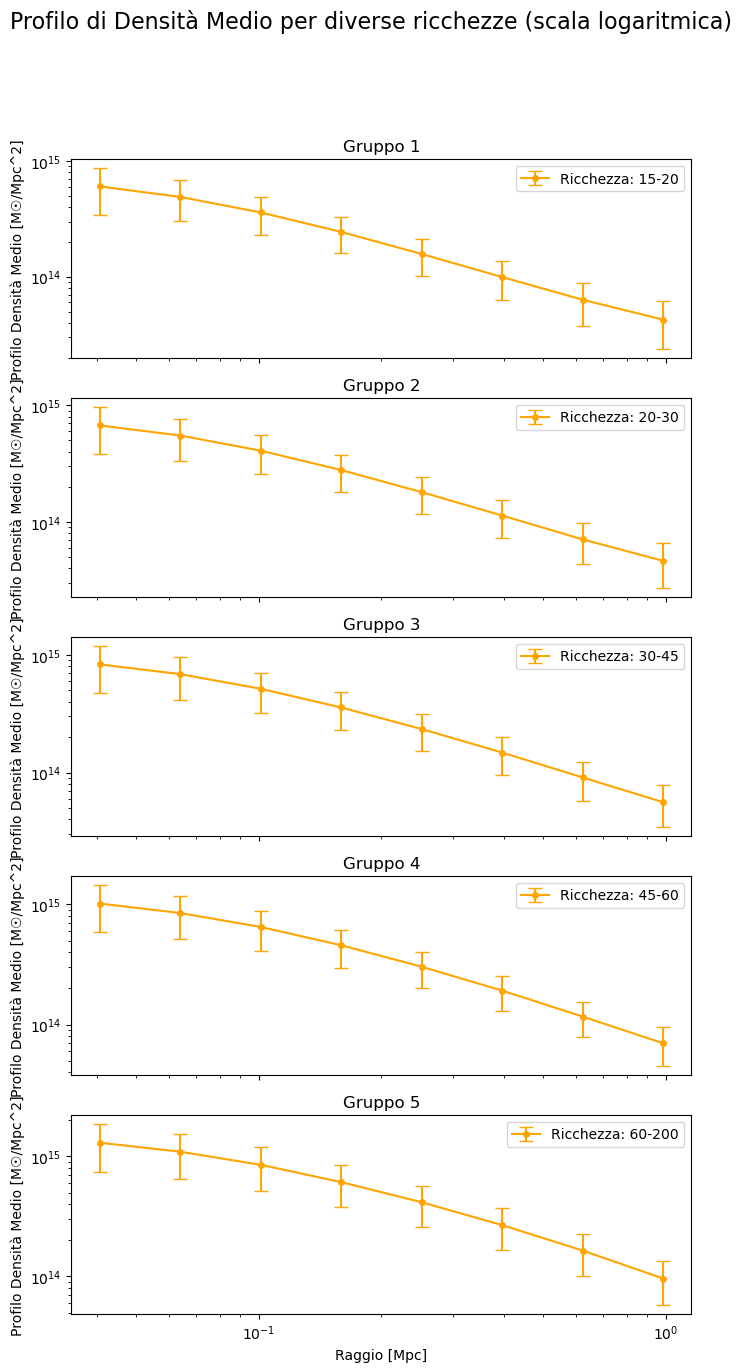

In [4]:
# Grafici in scala log-log

fig, axs = plt.subplots(5, 1, figsize=(8, 15), sharex=True)

# Per ogni gruppo, disegno il profilo densità medio in funzione di R, con la deviazione standard
for i in range(5):
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")
    axs[i].errorbar(R_values, profilo_medi[i], yerr=devstd_profilo_medi[i], fmt='o-', color='orange', label=f'Ricchezza: {intervalli_λ[i]}-{intervalli_λ[i+1]}', capsize=5, markersize=4)
    axs[i].set_ylabel('Profilo Densità Medio [M☉/Mpc^2]')
    axs[4].set_xlabel('Raggio [Mpc]')
    axs[i].set_title(f'Gruppo {i+1}')
    axs[i].legend()
    axs[i].tick_params(axis='both', which='both', labelsize=10)

fig.suptitle('Profilo di Densità Medio per diverse ricchezze (scala logaritmica)', fontsize=16)
plt.show()

**SECONDA PARTE**

In questa parte viene richiesto di usare il fit analitico NFW per stimare per ogni intervallo di ricchezza la massa ($log_{10}(M)$) e la concentrazione media $c$. A tal scopo si assume una Likelihood Gaussiana utilizzando le matrici di covarianza fornite per ogni intervallo di ricchezza, e i prior uniformi forniti per i parametri ($log_{10}(M)$ ∈ [13,16], $c$ ∈ [0.2,20]); per ogni bin di ricchezza si utilizza il relativo redshift medio. E' stato utilizzato il sofware emcee per derivare i posteriors sui parametri.

/Users/gaiabilosi/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0



Gruppo: 1
Best fit parameters: [10.28872258  2.99298974]


  0%|                                                  | 0/5500 [00:00<?, ?it/s]/Users/gaiabilosi/anaconda3/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████| 5500/5500 [00:04<00:00, 1240.32it/s]
/Users/gaiabilosi/anaconda3/lib/python3.11/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]


Tempo di autocorrelazione τ: [nan nan]
Flat samples shape: (172800, 2)
samples shape: (5500, 32, 2)

Gruppo: 2
Best fit parameters: [14.40885301  2.79772694]


100%|██████████████████████████████████████| 5500/5500 [00:30<00:00, 182.22it/s]


Tempo di autocorrelazione τ: [35.99474682 34.67456   ]
Flat samples shape: (172800, 2)
samples shape: (5500, 32, 2)

Gruppo: 3
Best fit parameters: [14.56837263  3.06711196]


100%|██████████████████████████████████████| 5500/5500 [00:24<00:00, 225.65it/s]
/Users/gaiabilosi/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/gaiabilosi/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Tempo di autocorrelazione τ: [30.46675925 32.93264043]
Flat samples shape: (172800, 2)
samples shape: (5500, 32, 2)

Gruppo: 4
Best fit parameters: [14.72062521  3.31349567]


100%|██████████████████████████████████████| 5500/5500 [00:25<00:00, 217.94it/s]


Tempo di autocorrelazione τ: [32.47896021 30.47214325]
Flat samples shape: (172800, 2)
samples shape: (5500, 32, 2)

Gruppo: 5
Best fit parameters: [14.92470845  3.56817326]


100%|██████████████████████████████████████| 5500/5500 [00:32<00:00, 170.22it/s]


Tempo di autocorrelazione τ: [30.45578773 32.28766159]
Flat samples shape: (172800, 2)
samples shape: (5500, 32, 2)


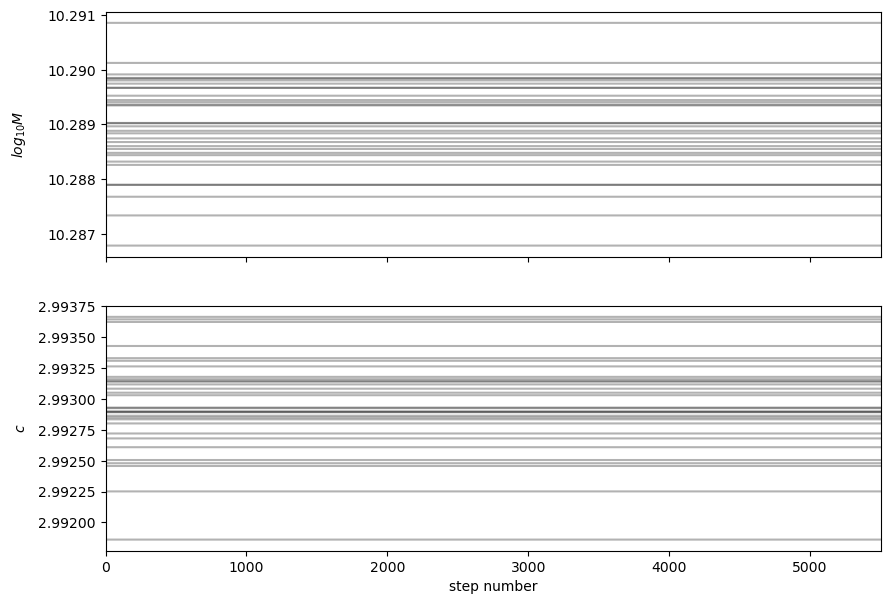

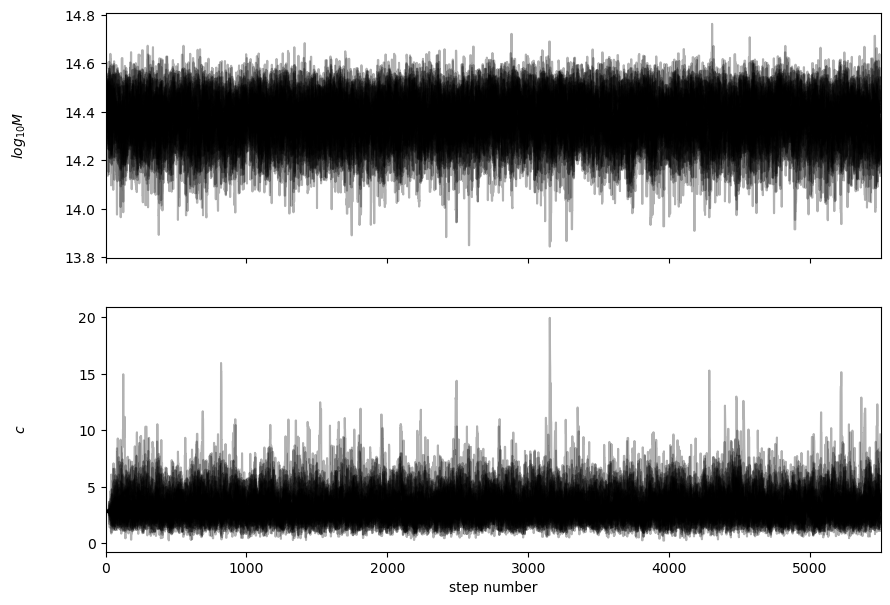

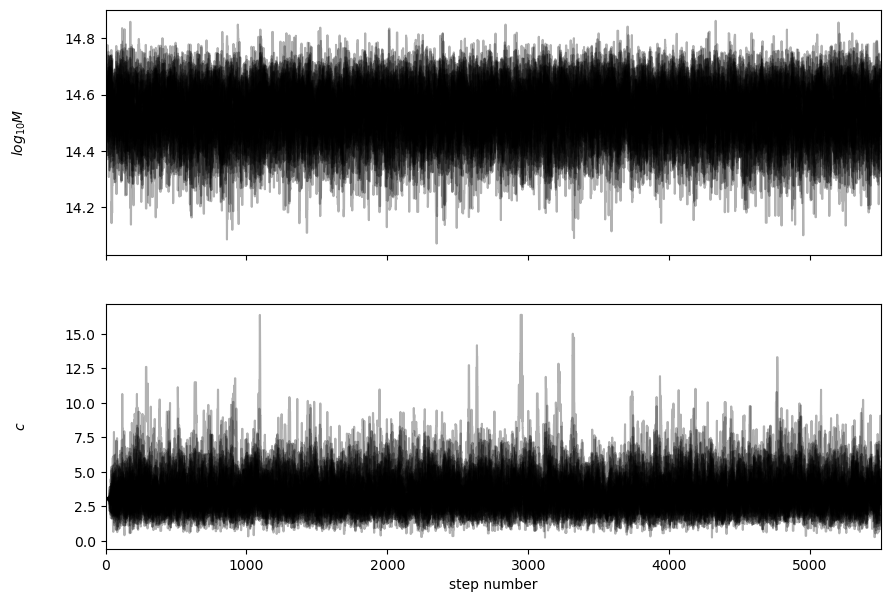

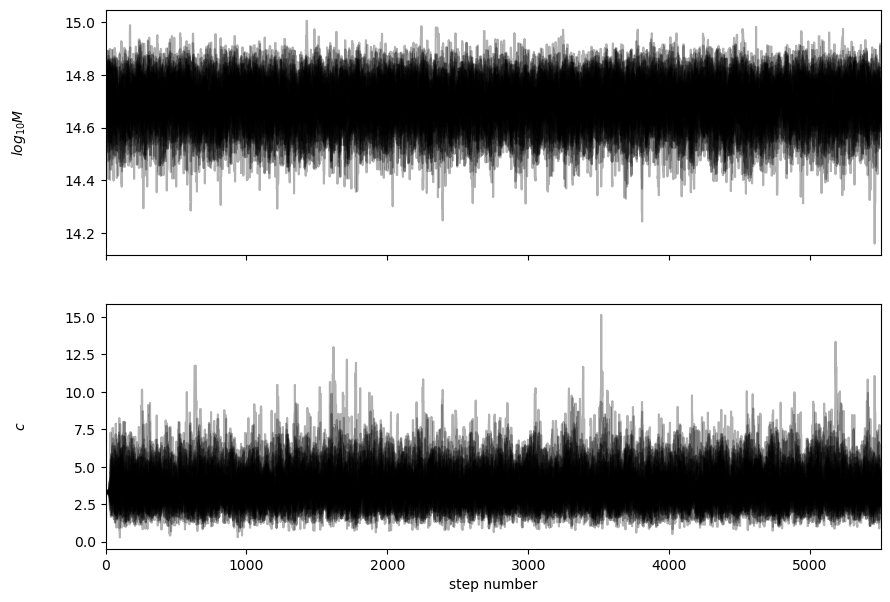

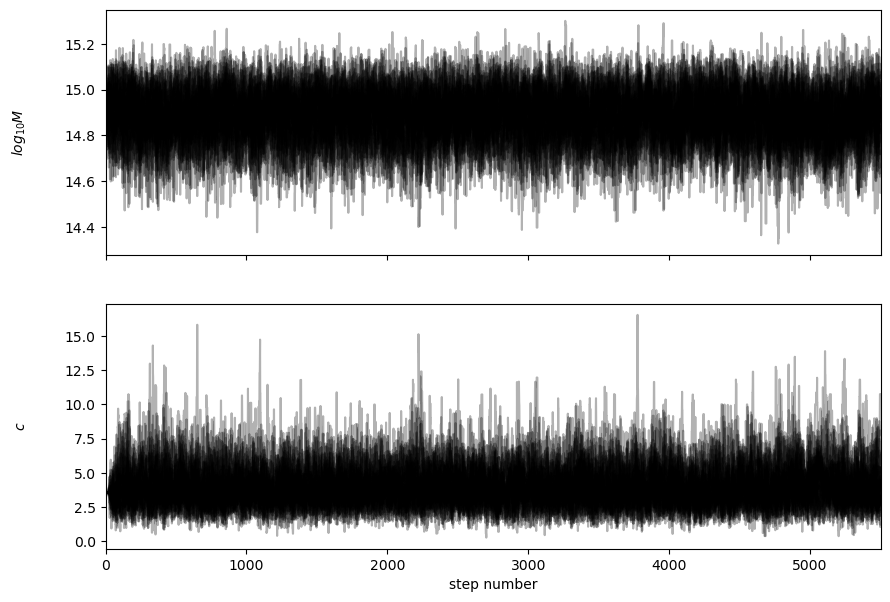

In [5]:
# Carico i dati necessari
cov_matrix = np.load('/Users/gaiabilosi/Desktop/covariance_matrices.npy')

# Definisco la funzione NFW che calcola il profilo di densità di un ammasso, come fatto nel primo esercizio

def nfw(r, M, c, z): 

 # Definisco le costanti fornite
  rho_m = 0.286 * 0.7**2 * (2.7751428946 * 10**11)  # Densità media dell'universo approx.[M☉/(Mpc)^3]
  f_c = math.log(1 + c) - (c / (1 + c)) 
  delta_char = 200 * c**3 / (3 * f_c)  # Sovradensità caratteristica
  rho_s = rho_m * (1 + z)**3 * delta_char  # Densità caratteristica dell'ammasso [M☉/(Mpc)^3]
  # Calcolo il raggio caratteristico dell'ammasso, misurato in [Mpc]
  r_s = 1 / c * (3 * M / (4 * np.pi * 200 * rho_m * (1 + z)**3))**(1 / 3)
  # Calcolo la funzione f(x) definita a tratti con una funzione di numpy np.piecewise
  x = r / r_s
  f_x = np.zeros_like(x)
  for i in range (len(x)):
    if(x[i]<=1):
      f_x[i]=(1-(2*np.arctanh(math.sqrt((1-x[i])/(1+x[i]))))/(math.sqrt(1-x[i]**2)))/(x**2-1)[i]
    elif(x[i]==1):
      f_x[i]=1/3
    else:
      f_x[i]=(1-(2*np.arctan(math.sqrt((x[i]-1)/(1+x[i]))))/(math.sqrt(x[i]**2-1)))/(x**2-1)[i]

   # Calcolo e restituisco il profilo di densità, [M☉/(Mpc)^2]
  Sigma = 2 * r_s * rho_s * f_x
  return Sigma

# Implemento la funzione del log-prior che implementa un prior piatto (uniforme) sui parametri da stimare logM e c.
# Restituisce 0 se i parametri sono nel range definito e -np.inf altrimenti.
# La log-prior rappresenta il logaritmo della probabilità a priori dei parametri del modello.
def log_prior(params):
    logM, c = params
    if 13.0 <= logM <= 16.0 and 0.2 <= c <= 20.0:
        return 0.0
    return -np.inf

# Implemento la funzione del log-Likelihood del modello nfw rispetto ai dati di profilo di densità.
# Utilizzo la matrice di covarianza per considerare le incertezze nei dati.
def log_Likelihood(params, r, profilo_densita_data, cov_matrix, z):
    logM, c = params
    M = 10**(logM)
    model = nfw(r, M, c, z)
    residuals = profilo_densita_data - model
    cov_inv = np.linalg.inv(cov_matrix)
    return - 0.5 * np.dot(residuals, np.dot(cov_inv, residuals))

# Definisco la funzione del log-posterior: somma del log-prior e del log-likelihood, consente di ottenere una stima dei parametri più informativa.
# Se il log-prior è infinito, la log-posterior diventa infinitamente negativa.
# Nel campionamento MCMC è la funzione che si cerca di campionare per ottenere una rappresentazione della distribuzione dei parametri. 
def log_posterior(params, r, profilo_densita_data, cov_matrix, z):
    logprior = log_prior (params)
    if not np.isfinite(logprior):
        return -np.inf
    logL = log_Likelihood(params,r, profilo_densita_data, cov_matrix, z)
    return logL + logprior

# Ora utilizzo il software EMCEE per derivare i posteriors sui parametri su ogni intervallo

# Definisco gli array dei risultati e quello dei best fit
samples_results = np.ndarray((5,172800,2)) #(5000-120)*32 --> (nsteps-discarded)*nwalkers
bestfits = np.ndarray ((5,2))

# Voglio farlo per ciascuno dei 5 gruppi
for i in range(5):
    
    # Definisco nll, la funzione da minimizzare
    # si tratta semplicemente della log_posterior con segno cambiato
    nll = lambda *args: -log_posterior(*args)
    
    # Genero dei parametri iniziali casuali da una distr. normale 
    initial_params = np.array([14.0, 3.0])*(1 + 0.1 *np.random.randn(2))  # Valori iniziali per logM e c

    # Trovo i valori dei parametri che massimizzano nll (best fit parameters)
    soln = minimize(nll, initial_params, args=(R_values, profilo_medi[i], cov_matrix[i], z_medi[i]))
    logM_bf, c_bf = soln.x
    print()
    print('Gruppo:', i+1)
    print('Best fit parameters:', soln.x)
    bestfits [i] = soln.x  # sto salvando i dati nell'array, qui ci sono i valori che minimizzano nll
    
# Ora inizializzo la catena di Markov con i parametri iniziali perturbati
    pos = soln.x * (1+ 1e-4 * np.random.randn(32,2))
    nwalkers, ndim = pos.shape

# Uso il sampler emcee per eseguire la simulazione MCMC e ottenere una catena di Markov
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(R_values, profilo_medi[i], cov_matrix[i], z_medi[i]))
    sampler.run_mcmc (pos, 5500, progress=True);

# Ora trovo τ, il tempo di autocorrelazione
    τ = sampler.get_autocorr_time()
    print('Tempo di autocorrelazione τ:', τ)   
     
# Per ottenere la "catena appiattita", elimino la fase di burn-in
    flat_samples = sampler.get_chain(discard=100, flat=True)
    print('Flat samples shape:', flat_samples.shape)
    samples_results [i] = flat_samples # sto salvando i dati nell'array
    
# Creo due subplots per i miei due parametri della Markov chain
    fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
    samples = sampler.get_chain()
    print('samples shape:', np.shape(samples))
    labels = ["$log_{10}M$","$c$"]

# Creo i plot della distribuzione della catena di Markov

    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        axes[-1].set_xlabel("step number");
plt.show()

**APPROCCIO UTILIZZATO:** 
L'approccio seguito consiste nel generare, tramite il metodo EMCEE, un campione Monte Carlo che segue la Posterior Distribution. Quest'ultima rappresenta la distribuzione di probabilità dei parametri logM e c, che si desidera stimare basandosi sui profili di densità degli aloni (dati) e sul modello NFW utilizzato per il calcolo di tali profili. Analizzando le distribuzioni marginali della Posterior, è possibile risalire alla massa e alla concentrazione medie per ogni bin, nonché alle relative deviazioni standard.

**COMMENTO**

Le catene di Markov forniscono un'approximazione che tende a convergere alla distribuzione a posteriori. Tuttavia, il campionamento MCMC non è perfetto, e quindi è importante valutare graficamente la qualità di una catena di Markov. Un aspetto chiave da considerare è la convergenza e il "mixing".

La convergenza e il "mixing" possono essere valutati attraverso il trace plot, che visualizza l'andamento delle simulazioni nel tempo e fornisce indicazioni sulla presenza di una distribuzione limite. In generale, si cerca un grafico che mostri una dispersione casuale attorno a un valore medio; in queste circostanze, i risultati del modello suggeriscono che le catene si mescolano bene e che le impostazioni della MCMC sono adeguate.

Normalmente, un algoritmo MCMC genera catene di Markov in cui i campioni successivi sono autocorrelati a quelli immediatamente precedenti e successivi. Di conseguenza, i campioni consecutivi non sono indipendenti, ma formano una catena di Markov con un certo grado di correlazione. La misura di questa correlazione è fornita dall'autocorrelazione tra i valori consecutivi della catena. Ad esempio, il valore θ(i) tende ad essere più simile al valore θ(i-1) che al valore θ(i-2), o al valore θ(i-3), e così via. La valutazione di questa autocorrelazione è utile per comprendere quanto velocemente la catena esplora lo spazio dei parametri e se siano necessari più passi per ottenere campioni effettivamente indipendenti.

In questo caso nei 10 plot delle Markov chains le catene oscillano attorno ad un certo valore, che sarà quello più probabile per ciascun parametro (attorno a quel valore la distrubuzione Posterior dovrebbe presentare un picco). Noto che le traiettorie si sovrappongono, e che il tempo di autocorrelazione τ, ha un valore piccolo rispetto al numero di passi. Tutti questi fattori indicano una buona convergenza. 


Provo a dimostrare che le mie catene sono "buone" catene di Markov scrivendo un altro pezzo di codice.

In [ ]:
# Per ogni catena, crea un trace plot e mostra l'autocorrelazione
for i in range(5):
    fig, axes = plt.subplots(3, figsize=(10, 10), sharex=True)

    # Trace plot
    axes[0].plot(samples_results[i][:, 0], color='b', alpha=0.5, label="$log_{10}M$")
    axes[0].plot(samples_results[i][:, 1], color='r', alpha=0.5, label="$c$")
    axes[0].set_ylabel('Param Value')
    axes[0].legend()

    # Autocorrelazione
    axes[1].acorr(samples_results[i][:, 0] - np.mean(samples_results[i][:, 0]), maxlags=200, color='b', alpha=0.5, label="$log_{10}M$")
    axes[2].acorr(samples_results[i][:, 1] - np.mean(samples_results[i][:, 1]), maxlags=200, color='r', alpha=0.5, label="$c$")
    axes[1].set_ylabel('Autocorrelation')
    axes[2].set_ylabel('Autocorrelation')
    axes[2].set_xlabel('Lag')

    plt.show()


**TERZA PARTE**

In questa parte viene richiesto di: 
- riportare il valore di best-fit, il valor medio ed errore associato ad ogni parametro;
- fare un grafico triangolare per ogni intervallo di ricchezza per mostrare i posteriors ottenuti sui due parametri. 
- Verificare la bonta' del fit calcolando il chi-quadro per i best fit parameters; 
- infine confrontando i dati con ~100 valori di M e c estratti dalle catene; commentare i risultati.


In [ ]:
# Mi ristampo il valore di best-fit
for i in range(5):
  print("Valore di best-fit [logM,c] gruppo",i+1,":",bestfits[i])

# Calcolo il valore medio e l'errore associato ad ogni parametro (ricordo essere logM e c)
# Prima definisco gli array per valore medio ed errore e li inizializzo a zero

media_logM = np.zeros(5)
errore_logM = np.zeros(5)
media_c = np.zeros(5)
errore_c = np.zeros(5)

# Itero per ciascuno dei 5 gruppi di ricchezza, e stampo i risultati
print()
print("OTTENGO I SEGUENTI RISULTATI:")
print()
for i in range(5):
    media_logM[i] = np.mean(samples_results[i,:,0])
    errore_logM[i] = np.std(samples_results[i,:,0])
    media_c[i] = np.mean(samples_results[i,:,1])
    errore_c[i] = np.std(samples_results[i,:,1])
    print("Gruppo", i+1)
    print("Valore medio di logM:", media_logM[i])
    print("Errore associato logM:", errore_logM[i])
    print("Valore medio di c:", media_c[i])
    print("Errore associato c:", errore_c[i])
    print()

**COMMENTO**

Guardando i risultati numerici stampati, posso dedurre che che i valori medi e i parametri di best fit risultano tra loro compatibili. Il fatto che non siano esattamente uguali può dipendere da molteplici fattori, ad esempio un grado di incertezza statistica associabile ad entrambi. Inoltre, l'inizializzazione dei walkers con valori casuali delle perturbazioni può portare a una variabilità nella convergenza del fit. In conclusione quindi ci sono vari punti da tenere in considerazione per spiegare questa leggera differenza di valori. 

In [ ]:
gruppo = [1, 2, 3, 4, 5]

# Plot per logM
plt.errorbar(gruppo, media_logM, errore_logM, xerr=None, fmt='o', color='blue', capsize=5, label='Media logM')
plt.scatter(gruppo, bestfits[:, 0], color='magenta', marker='o', label='Best-fit $log_{10}M$')
plt.title("Medie e Best-fit $log_{10}M$ per Gruppo")
plt.xlabel("Numero Gruppo")
plt.ylabel("$log_{10}M$")
plt.xticks(gruppo)  # Mostra solo i numeri interi sull'asse delle x
plt.legend(loc='upper left')
plt.show()

# Plot per c
plt.errorbar(gruppo, media_c, errore_c, xerr=None, fmt='o', color='green', capsize=5, label='Media c')
plt.scatter(gruppo, bestfits[:, 1], color='purple', marker='s', label='Best-fit c')
plt.title("Medie e Best-fit c per Gruppo")
plt.xlabel("Numero Gruppo")
plt.ylabel("c")
plt.xticks()  # Mostra solo i numeri interi sull'asse delle x
plt.legend(loc='upper left')
plt.show()


**NOTA**

Da questi ultimi grafici posso confermare che i valori di $log_{10}M$ e c, sono compatibili sia tra i 5 diversi gruppi, sia con il valore di best fit associato.

In [ ]:
# Ora procedo con la creazione dei grafici triangolari, per ogni intervallo di ricchezza 
# per mostrare i posteriors ottenuti su logM e c
# Posso farlo in due modi 

# MODO I: Uso la libreria corner
# Itero per ciascuno dei 5 gruppi di ricchezza
for i in range(5):
    labels = ["$\\log_{10}M$", "$c$"]
    samples = samples_results[i]
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    corner.corner(samples, labels=labels, title_fmt='.4f', color='b',hist_kwargs={'color': 'skyblue'}, label_kwargs={'fontsize': 12}, fig=fig, use_math_text=True,)

    # Aggiungo etichette per indicare il gruppo e la ricchezza 
    axes[0, 1].annotate(f'Gruppo {i+1}', xy=(0.5, 0.5), xycoords='axes fraction',ha='center', va='center',fontsize=14,color='black',)
    axes[0, 1].annotate(f'Ricchezza: {intervalli_λ[i]}-{intervalli_λ[i+1]}',xy=(0.5, 0.4),xycoords='axes fraction',ha='center',va='center', fontsize=14,color='black',)

    plt.show()

In [ ]:
# # MODO II: Uso la libreria pygtc
# Itero per ciascuno dei 5 gruppi di ricchezza
for i in range(5):
    labels = ["$\\log_{10}M$", "$c$"]
    samples = samples_results[i]
    gtc = pygtc.plotGTC(samples, paramNames=labels, figureSize='MNRAS_page', nContourLevels=3)

    # Aggiungi etichetta per indicare il gruppo nell'angolo in alto a destra
    plt.annotate(f'Gruppo {i+1}', xy=(0.75, 1.5), xycoords='axes fraction', color='black', fontsize=11, ha='right', va='top')

    # Aggiungi etichetta per indicare l'intervallo di ricchezza
    plt.annotate(f'Ricchezza: {intervalli_λ[i]}-{intervalli_λ[i+1]}', xy=(0.9, 1.4), xycoords='axes fraction', color='black', fontsize=11, ha='right', va='top')

    plt.show()

**COMMENTO**
Questi grafici triangolari ci permettono di osservare le distribuzioni marginali e le correlazioni tra i parametri logM e c.

Le celle sulle diagonali rappresentano le distribuzioni marginali dei due parametri: i picchi rappresentano i valori più probabili; da questi grafici è possibile anche ricavare informazioni sulla precisione e sull'attendibilità delle stime. L'altezza del picco determina la probabilità associata alla stima. La larghezza della distribuzione fornisce invece informazioni sull'incertezza del parametro.

Per quanto riguarda i grafici nell'angolo, essi contengono un grafico di dispersione per evidenziare la relazione tra i parametri stimati, in cui ogni punto rappresenta una coppia di valori campionati dai parametri corrispondenti nella catena di Markov. Le dispersioni, inoltre, appaiono ellittiche: questo ci suggerisce che vi è correlazione tra logM e c. Le ellissi hanno tutte inclinazione negativa, che implica una correlazione negativa: quindi valori più alti di logM sono associati a valori più bassi di c. Infine, le regioni con colore più intenso indicano maggiore probabilità (= la catena ha trascorso più tempo in questa regione). In queste regioni il modello ha una probabilità più alta di generare dati osservati.





In questo grafico triangolare possiamo osservare vedere la Posterior distribution e le distribuzioni marginali:

Si osserva che la Posterior distribution è asimmetrica. Quest'ultimo fatto potrebbe esser dovuto all'assimmetria dei dati.
Come già accennato, in corrispondenza dei picchi delle marginali (in alto e a destra), troviamo sull'asse delle ascisse valori più probabili per i parametri. Inoltre, dalla larghezza delle distribuzioni, possiamo avere un'idea anche dell'incertezza sulla loro stima.
Infine, dal grafico in basso a sinistra, deduciamo, vista l'inclinazione dell'ellisse, la presenza di correlazione negativa tra i parametri logM e c: a valori più alti di logM, corrispondono valori più piccoli per c. Per quanto riguarda invece la colorazione dell'ellisse, le zone più scure indicano una maggior presenza di dati campionati in tale regione, cioè coppie di stime per i parametri (logM,c) più probabili.
NOTA: mentre il valore medio rimane sempre tra 3 e 4 per c, e attorno a 13 per logM, il valore di best-fit ha una forte dipendenza dai parametri da cui parto per il calcolo della funzione minimize(). Questa infatti trova i valori dei parametri che minimizzano la funzione di obiettivo nll(), ovvero massimizzano la logPosterior, ovvero nell'intervallo in cui la Prior è non nulla, (essendo la logPrior costante) massimizzano la Likelihood (cioè massimizzano la probabilità di trovare i dati ottenuti). Quando si cambiano i valori di initial, si sta cambiando l'area dello spazio dei parametri che viene esplorata dalla funzione minimize(), quindi è possibile che si trovino valori di parametri che minimizzano la funzione di obiettivo ancora di più. Si può tuttavia far riferimento al chi-quadro per avere un'idea della bontà del fit.

In [ ]:
# Verifico la bontà del fit calcolando il χ^2 per i best fit parameters con la matrice di covarianza
# χ^2 = ∑_(i=1,N) ((x-μ)^T * cov^(-1) * (x-μ))
# x = sono i valori osservati (i dati del profilo di densità medio)
# μ = sono i valori attesi dal modello NFW con i best-fit parameters
# cov = è la matrice di covarianza completa
# N = è il numero totale di punti nel profilo di densità

def chi_squared(observed, expected, cov_matrix):
    residuals = observed - expected
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    chi_sq = np.dot(residuals, np.dot(inv_cov_matrix, residuals))
    return chi_sq

chi_squared_values_cov = np.zeros(5)

for i in range(5):
    logM_bestfit, c_bestfit = bestfits[i]
    model_predictions_cov = nfw(R_values, 10**logM_bestfit, c_bestfit, z_medi[i])
    chi_squared_values_cov[i] = chi_squared(profilo_medi[i], model_predictions_cov, cov_matrix[i])

# Stampo i valori del chi-quadro
print("Valori del χ^2 per i best fit parameters usando la matrice di covarianza:")
for i, chi_squared_cov in enumerate(chi_squared_values_cov):
    print(f"Gruppo {i+1}: {chi_squared_cov}")
    
# Grafico dei 5 valori del χ^2
plt.plot(gruppo, chi_squared_values_cov, 'o', color='red', markersize=8, linestyle='None')
plt.title("Valori del $\chi^2$ per i best fit parameters")
plt.xlabel("Numero Gruppo")
plt.ylabel("$\chi^2$")
plt.xticks(gruppo)  # Mostro solo i numeri interi sull'asse delle x
plt.show()

'''
metodo con chatgpt che mi da valori assurdi 
Gruppo 1: 9.409385583881589e-28
Gruppo 2: 7.092363135432471e-28
Gruppo 3: 3.0379013774589614e-28
Gruppo 4: 1.5279923264706958e-28
Gruppo 5: 2.0389507831082254e-29
# Verifico la bontà del fit calcolando il χ^2 per i best fit parameters con la matrice di covarianza
# χ^2 = ∑_(i=1,N) ((x-μ)^T * cov^(-1) * (x-μ))
# x = sono i valori osservati (i dati del profilo di densità medio)
# μ = sono i valori attesi dal modello NFW con i best-fit parameters
# cov = è la matrice di covarianza completa
# N = è il numero totale di punti nel profilo di densità

chi_squared_values = np.zeros(5)

for i in range(5):
    logM_bestfit, c_bestfit = bestfits[i]
    model_predictions = nfw(R_values, 10**logM_bestfit, c_bestfit, z_medi[i])
    
    # Utilizziamo la matrice di covarianza completa
    cov_matrix_complete = cov_matrix[i] * devstd_profilo_medi[i]**2
    chi_squared_values[i] = np.dot((profilo_medi[i] - model_predictions).T, np.linalg.solve(cov_matrix_complete, profilo_medi[i] - model_predictions))

# Stampo i valori del chi-quadro
print("Valori del χ^2 per i best fit parameters utilizzando la matrice di covarianza completa:")
for i, chi_squared in enumerate(chi_squared_values):
    print(f"Gruppo {i+1}: {chi_squared}")

# Creiamo il grafico del chi-quadro
plt.errorbar(gruppo, chi_squared_values, fmt='o', color='red', capsize=5, label='$\chi^2$')
plt.title("Valori del $\chi^2$ per i Best Fit Parameters")
plt.xlabel("Numero Gruppo")
plt.ylabel("$\chi^2$")
plt.xticks(gruppo)  # Mostra solo i numeri interi sull'asse delle x
plt.legend()
plt.show()

'''

'''
meteodo senza usare matrice covarianza--> sbagliato
# Verifico la bontà del fit calcolando il χ^2 per i best fit parameters 
# χ^2 = ∑_(i=1,N) ((x-μ)/σ)^2
# x = sono i valori osservati (i dati del profilo di densità medio)
# μ = sono i valori attesi dal modello NFW con i best-fit parameters
# σ = sono le deviazioni standard associate ai valori osservati
# N = è il numero totale di punti nel profilo di densità

chi_squared_values = np.zeros(5)

for i in range(5):
    logM_bestfit, c_bestfit = bestfits[i]
    model_predictions = nfw(R_values, 10**logM_bestfit, c_bestfit, z_medi[i])
    chi_squared_values[i] = np.sum(((profilo_medi[i] - model_predictions) / devstd_profilo_medi[i])**2)

# Stampo i valori del chi-quadro
print("Valori del χ^2 per i best fit parameters:")
for i, chi_squared in enumerate(chi_squared_values):
    print(f"Gruppo {i+1}: {chi_squared}")

# Metto i dati in un grafico per visualizzarli meglio
gruppi = [1, 2, 3, 4, 5]

plt.scatter(gruppi, chi_squared_values, color='skyblue')
plt.xlabel('Gruppo')
plt.ylabel('$\chi^2$')
plt.title('Valori di $\chi^2$ per i Best Fit Parameters per ciascun Gruppo')
plt.xticks(gruppi)

plt.show()
'''

In [ ]:
# Voglio vedere il confronto del fit con i dati osservati
# Creo i pannelli del grafico
fig, axs = plt.subplots(5, 1, figsize=(8, 15), sharex=True)

# Per ogni gruppo, disegno il profilo densità medio e il profilo ottenuto con i best-fit
for i in range(5):
    logM_bestfit, c_bestfit = bestfits[i]
    model_predictions = nfw(R_values, 10**logM_bestfit, c_bestfit, z_medi[i])

    axs[i].errorbar(R_values, profilo_medi[i], yerr=devstd_profilo_medi[i], fmt='o-', color='orange', label='Dati Osservati', capsize=5, markersize=4)
    axs[i].plot(R_values, model_predictions, 'b-', label='Modello (Best Fit)', linewidth=2)

    axs[i].set_ylabel('Profilo Densità Medio [M☉/Mpc^2]')
    axs[4].set_xlabel('Raggio [Mpc]')
    axs[i].set_title(f'Gruppo {i+1}')
    axs[i].legend()
    axs[i].tick_params(axis='both', which='both', labelsize=10)

# Aggiunta di un titolo generale
fig.suptitle('Confronto tra Profili Densità Osservati e Modellati (Best Fit) per diverse ricchezze', fontsize=16)

# Visualizzo il grafico
plt.show()



**COMMENTO**

I valori del $\chi^2$ ottenuti per i best-fit parameters nei diversi gruppi indicano quanto bene il modello NFW con i parametri ottimizzati si adatta ai dati osservati. In generale, un valore del $\chi^2$ più basso suggerisce un buon adattamento tra il modello e i dati, mentre un valore più alto può indicare una discrepanza tra le previsioni del modello e i dati osservati.
Complessivamente il valore di $\chi^2$ è piccolo (e sempre minore di 1), questo è un buon segnale. 
Dal primo grafico è evidente che il $\chi^2$ diminuisce man mano che cresce il valore di ricchezza; in pratica il fit migliora. A conferma di questa deduzione, sono stati plottati anche 5 ulteriori grafici in cui si metteno a confronto i profili di densità ottenuti con i parametri di best-fit, e quelli ottenuti dai dati sperimentali.
Da questi ultimi grafici si può osservare bene la maggiore precisione del fit man mano che la ricchezza aumenta, nell'ultimo grafico è quasi impercettibile la differenza tra la linea gialla e quella blu, mentre in quelli soprastanti le due curve si discostano di più.

In [ ]:
# Ora confronto i dati con ~100 valori di M e c da ciascuna catena di Mrkov per ogni gruppo
# Per ogni valore estratto, ho calcolato il profilo di densità corrispondente e lo ho tracciato sul grafico insieme ai dati osservati. 
# Ho utilizzato il colore grigio per le linee estratte casualmente, il giallo e il blu

# Creo i pannelli del grafico con dimensioni più grandi
fig, axs = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

# Per ogni gruppo, disegno il profilo densità medio, il profilo ottenuto con i best-fit e ~100 profili ottenuti da catene casuali
for i in range(5):
    logM_bestfit, c_bestfit = bestfits[i]
    model_predictions_bestfit = nfw(R_values, 10**logM_bestfit, c_bestfit, z_medi[i])

    axs[i].errorbar(R_values, profilo_medi[i], yerr=devstd_profilo_medi[i], fmt='o-', color='orange', label='Dati Osservati', capsize=5, markersize=4)
    axs[i].plot(R_values, model_predictions_bestfit, 'b-', label='Modello (Best Fit)', linewidth=2)

    # Estraggo casualmente ~100 valori di M e c dalle catene
    random_samples = samples_results[i][np.random.choice(samples_results[i].shape[0], size=100, replace=False)]
    for sample in random_samples:
        logM_sample, c_sample = sample
        model_predictions_sample = nfw(R_values, 10**logM_sample, c_sample, z_medi[i])
        axs[i].plot(R_values, model_predictions_sample, 'gray', alpha=0.1)

    axs[i].set_ylabel('Profilo Densità Medio [M☉/Mpc^2]')
    axs[i].set_title(f'Gruppo {i+1}')
    axs[i].legend()
    axs[i].tick_params(axis='both', which='both', labelsize=12)

# Aggiunta di un titolo generale
fig.suptitle('Confronto tra Profili Densità Osservati, Modellati (Best Fit) e Estratti Casualmente per diverse ricchezze', fontsize=18)

# Visualizzo il grafico
plt.show()

'''
# Creo i pannelli del grafico
fig, axs = plt.subplots(5, 1, figsize=(8, 15), sharex=True)

# Per ogni gruppo, estraggo casualmente ~100 valori da ciascuna catena di Markov
num_samples = 100

for i in range(5):
    samples_chain = samples_results[i]
    random_indices = np.random.choice(samples_chain.shape[0], num_samples, replace=False)
    random_samples = samples_chain[random_indices, :]

    # Per ogni valore estratto, calcolo il profilo di densità corrispondente e lo traccio
    for j in range(num_samples):
        logM_sample, c_sample = random_samples[j]
        model_predictions = nfw(R_values, 10**logM_sample, c_sample, z_medi[i])
        axs[i].plot(R_values, model_predictions, color='gray', alpha=0.2)

    # Aggiungo i dati osservati al grafico, quelli che ho plottato all'inizio
    axs[i].errorbar(R_values, profilo_medi[i], yerr=devstd_profilo_medi[i], fmt='o-', color='orange', label='Dati Osservati', capsize=5, markersize=4)
    axs[i].set_ylabel('Profilo Densità Medio [M☉/Mpc^2]')
    axs[4].set_xlabel('Raggio [Mpc]')
    axs[i].set_title(f'Gruppo {i+1}')
    axs[i].legend()
    axs[i].tick_params(axis='both', which='both', labelsize=10)

fig.suptitle('Confronto tra Profili Densità Osservati e Estratti Casualmente per diverse ricchezze', fontsize=16)

plt.show()
'''


**COMMENTO**

I grafici mostrano un confronto tra i profili di densità osservati, i profili modellati con i parametri di best-fit e  100 profili ottenuti casualmente dalle catene di Markov per ciascun gruppo di ricchezza. I punti arancioni con barre di errore rappresentano i dati osservati, mentre la linea blu rappresenta il profilo di densità ottenuto con i parametri di best-fit.
I profili di densità ottenuti casualmente dalle catene di Markov sono rappresentati da linee grigie trasparenti. Ogni linea grigia rappresenta un diverso set di parametri M e c estratti casualmente dalle catene.


# NOTE TEORICHE

**SOFTWARE EMCEE**: EMCEE è una libreria Python che implementa il campionamento di tipo Monte Carlo a catena di Markov (MCMC) utilizzando l'algoritmo Ensemble Sampler di Goodman e Weare. Questo approccio è particolarmente utile per esplorare spazi parametrici complessi e ottenere campioni da distribuzioni posterior. Funziona in questo modo:

1. Inizializzazione del Campione Iniziale: EMCEE inizia con un insieme di catene iniziali di parametri. Ogni catena rappresenta un insieme di valori possibili per i parametri del modello.
2. Proposizioni di Passi: Per ogni catena, vengono proposti nuovi punti nel parametro spaziale. L'algoritmo cerca di esplorare lo spazio parametrico in modo efficace attraverso queste proposte.
3. Valutazione della Likelihood: Per ogni punto proposto, viene calcolata la likelihood, che rappresenta quanto bene il modello spiega i dati osservati.
4. Valutazione dei Priori: Si applicano i priori, che sono le conoscenze a priori sulle distribuzioni dei parametri. Questo è il modo in cui le informazioni esterne vengono incorporate nell'analisi.
5. Aggiornamento del Campione: Gli accettanti vengono aggiunti al campione, e questi punti influenzano la generazione di nuovi punti nelle iterazioni successive. L'algoritmo è progettato per essere efficiente nell'esplorare regioni ad alta probabilità della distribuzione.
6. Iterazione: I passi 2-5 vengono ripetuti per un numero sufficiente di iterazioni fino a quando il campione converge alla distribuzione di probabilità desiderata.
7. Analisi dei Risultati: Una volta completato il campionamento, è possibile analizzare il campione risultante per ottenere stime dei parametri e relative incertezze attraverso le distribuzioni marginali dei parametri.

EMCEE è flessibile e può essere applicato a una vasta gamma di problemi in cui è necessario campionare da distribuzioni posterior. Tuttavia, richiede attenzione nella scelta dei parametri iniziali e nell'interpretazione dei risultati ottenuti.